# Trabalho 03 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
#Manipulação de dados, bases e geração de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Bibliotecas utilizadas de exemplos estraidos de: https://www.datacamp.com/community/tutorials/probability-distributions-python
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## 1. Bernoulli

Uma distribuição de Bernoulli tem apenas dois resultados possíveis, 1 (sucesso) e 0 (falha), e uma única tentativa, como uma peça boa ou uma peça defeituosa. Portanto, a variável aleatória X, que possui uma distribuição de Bernoulli, pode assumir o valor 1 com a probabilidade de sucesso, p. E o valor 0 com a probabilidade de falha, q ou 1-p. As probabilidades de sucesso e fracasso não precisam ser igualmente prováveis. A distribuição de Bernoulli é um caso especial da distribuição binomial em que um único ensaio é realizado (n = 1). Sua função de massa de probabilidade é dada por:


Um exemplo simples e comum, é a probabilidade no lançamento de uma moeda dar cara ou coroa.

In [2]:
#realizando o lançamento de 1000 moedas não viciadas e o cálculo da probabilidade de cada
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=1000,p=0.5)

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Bernoulli')]

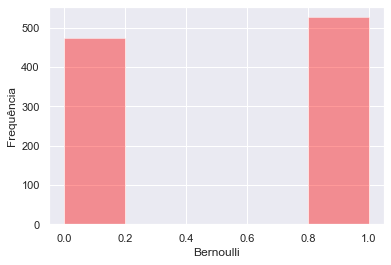

In [3]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="red")
ax.set(xlabel='Bernoulli', ylabel='Frequência')

## 2. Binomial

A binomial trata-se de um distribuição em que apenas dois resultados são possíveis (0, 1), como sucesso ou fracasso, vitória ou derrota e onde a probabilidade de sucesso e fracasso é a mesma para todos os ensaios. No entanto, os resultados não precisam ser igualmente prováveis e cada estudo é independente um do outro. Da-se pela seguinte equação:
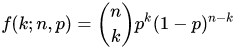
Onde:
##### n: o número de vezes que realizamos nosso experimento. 
##### p: a probabilidade de sucesso.
##### k: o número alvo de sucessos. 

Para exemplificar, vamos simular o lançamento de uma moeda não viciada. Lançaremos 1000 vezes, e veremos os resultados em grupos de 10 lançamentos tomando a quantidade de caras como verdade.

Text(0, 0.5, 'Frequência')

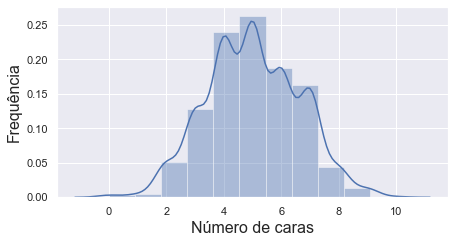

In [4]:
# Número de vezes a realizar o experimento
trials = 1000
# Número de lançamentos por grupo de teste
n = 10
# Chance de cada cara
p = 0.5
# Função para rodar o esperimento e tomando 1 (verdade) como cara
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads

heads = run_binom(trials, n, p)
# Plotando
fig, ax = plt.subplots(figsize=(7,3.5))
ax = sns.distplot(heads, bins=11, label='Resultado da simulação')
ax.set_xlabel("Número de caras",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)

## 3. Poisson

Poisson é comumente utilizada para calcular número de vezes que um evento ocorreu em um intervalo de tempo. Por exemplo, quantos carros passaram em uma rodovia x em determinado momento. A distribuição de Poisson é descrita em termos da taxa (μ) na qual os eventos acontecem. O número médio de eventos em um intervalo é designado λ (lambda).
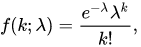



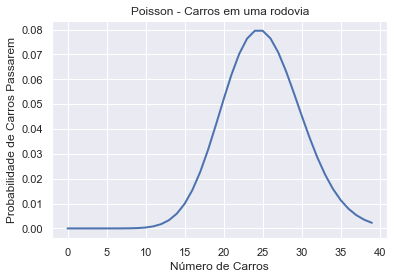

In [5]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
plt.ylabel('Probabilidade de Carros Passarem')
plt.xlabel('Número de Carros')
plt.title('Poisson - Carros em uma rodovia')
arr = []
rv = poisson(25)
for num in range(0,40):
 arr.append(rv.pmf(num))
 
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.show()

## 4. Geométrica
A distribuição geométrica é a distribuição do número de tentativas necessárias para obter o primeiro sucesso em tentativas repetidas de Bernoulli.


Para exemplificar, pensemos em um jogo de luta com 10 personagens disponíveis. Neste jogo há uma opção torneio, onde o jogador tem de lutar com 8 personagens. Contudo, há um pesonagem entre os 10 quese for selcionado pelo openete (máquina) na final (oitava partida), ele é quase impossível de se derrotar. Qual a probabilidade de tal personagem ser selecionado?

Probabilidade do personagem ser escolhido na oitava vez:  0.05314410000000001


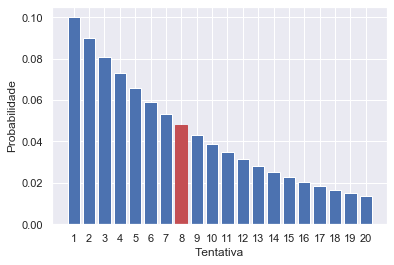

In [6]:
import matplotlib.pyplot as plt

def probability_to_occur_at(attempt, probability):
    return (1-p)**(attempt - 1) * probability

p = 0.1
attempt = 7 #por ser vetor é um valor a menos
attempts_to_show = range(21)[1:]
print('Probabilidade do personagem ser escolhido na oitava vez: ', probability_to_occur_at(attempt, p))
plt.xlabel('Tentativa')
plt.ylabel('Probabilidade')
barlist = plt.bar(attempts_to_show, height=[probability_to_occur_at(x, p) for x in attempts_to_show], tick_label=attempts_to_show)
barlist[attempt].set_color('r')
plt.show()

# 5. Uniforme
### Exemplicando
##### Uma distribuição uniforme pode ser calculada pela função: 
\begin{equation} f(x)=\begin{cases} \frac{1}{b-a}   & a \leq x \leq b\\0 & x<a\ ou \ x>b\end{cases} \end{equation}

De forma geral, trata-se de uma forma de calcular a probabilidade de uma determinada ocorrência dentro de uma área sobre o eixo X. Mas o que significa isto?

##### Exemplificando
Vamos simular como exemplo a partida de um jogo de e-sports como moba (Dota ou League of Legends), que gasta-se em torno de 20 até 50 minutos. Agora, imagine que você esteja jogando e tenha que ir para a aula, mas queira jogar só mais uma partida antes de ir. Você sabe que seu ônibus passa em uma hora, e que você gasta 20 minutos para se aprontar e chegar até o ponto. Ou seja, você precisa que a partida dure até 40 minutos. Qual a probabilidade de a partida acabar a tempo se começar agora?

Pense na probabilidade como uma reta que varia no eixo X (tempo). Onde o "a" é o tempo mínimo para acabar a partida (20 minutos), "b" é o tempo máximo em que a partida pode acabar (50 minutos). 1/b-a -> 1/50-20 -> 1/30. Ou seja, 1/30 nos diz que temos uma variação de 30 minutos, sendo assim a chance de uma partida acabar entre 20 à 50 minutos é de 100%. 

Blz, mas isso não responde nossa pergunta. Bem, sendo assim, basta pensar. Se 30 minutos é 100%, e 40 minutos é o tempo máximo que podemos esperar que a partida acabe, então o intervalo entre 40 e 20 minutos é o nosso interesse. Logo, se pegarmos o ponto 40 minutos, subtraírmos pelo ponto mínimo (20 minutos), e aplicarmos regra de 3, sobre o tempo máximo (30 minutos é 100%), temo que o tempo total em que a partida pode acabar corresponde a 20/30. O que da aproximadamente 66,67% de chance dele ocorrer.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/1200px-Uniform_Distribution_PDF_SVG.svg.png" width="250"></img>

 De forma geral, basta associar 'a' e 'b' como o intervalo total possível de algo ocorrer (100%), e pegar a área dentro desse intervalo entre pontos que são do interesse de que se ocorra.

In [7]:
# Importando a função Uniforme
from scipy.stats import uniform

In [8]:
# Gerando valores aleatorios para uma distribuição Uniforme
# Simulando 100 ocorrências de duração da partida
n = 100 
start = 20
width = 50
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Distribuição Uniforme ')]

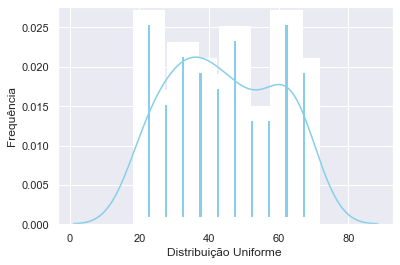

In [9]:
ax = sns.distplot(data_uniform,
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribuição Uniforme ', ylabel='Frequência')

## 6. Exponencial
A distribuição exponencial descreve o tempo entre os eventos em um processo de ponto de Poisson, ou seja, um processo no qual os eventos ocorrem de forma contínua e independente a uma taxa média constante. Possui um parâmetro λλ chamado parâmetro de taxa e sua equação é descrita como:
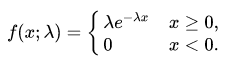

Reaproveitando o exemplo anterior sobre uma partida de moba. Em jogos como esse, uma das ações possíveis é a de matar um adversário (abate/kill). Vamos supor que você sempre consiga derrotar 20 adversários em partidas que duram 40 minutos. Qual a probabilidade de conseguir um abate em um intervalo de 2 minutos entre um abate e outro?

lambda = 0.5 (20 abates por partida / 40 mintuos de jogo por partida = 0.5 abates por minuto)
theta = média de tempo gasto por um abate = 1 / 0.5 = 2

In [10]:
from scipy import integrate
def compute_prob(res):
    """
    Simple integration function to get the area under the PDF
    """
    prob = 0
    for i in res:
        prob -= round(i, 6)
    print( "Probabilidade de conseguir uma abate: ",(-1) * prob *100,"%")
# Set local variables
lam = 0.5
theta = 1 / lam
x_min = 2
x_max = np.inf
# Criando PDF
x = lambda x: (theta)*np.exp(-theta*x)
# Integralizando
compute_prob(integrate.quad(x, x_min, x_max))


Probabilidade de conseguir uma abate:  1.8316 %


## 7. Gausiana (Normal)
A distriuilção normal (Gausiana), busca com base na média e mediana, tentar obter a probabilidade de ocorrências de certos casos. A sua curva de forma geral, tem um formato de sino, uma vez que a mesma vai possuir o seu maior valor no eixo Y baseado no valor médio de ocorrências. Contudo, em caso de bases desbalanceadas, com muitos outliers, o seu gráfico pode tendencionar a um declive mais suave.

Assim como a Uniforme, a Gausiana calcula a probabilidade baseada na área. Contudo, aqui, ela tenta gerar uma probabilidade com um "peso" maior em cima do comportamento mais comuns sobre a população.

No exemplo a baixo, fora utilizado dados reais referentes a preço de HQs em uma loja virutal de quadrinhos da Marvel. Apartir então do histórico coletado, é possível tentar prever a probabilidade do valor de uma nova revista. Neste exemplo, pode-se visualizar que há maior probabilidade de preço é entre aproximadamente 5 e 10 dólares.

In [11]:
from scipy.stats import norm
# Carregando a Base para não ter que ficar rodando sempre a parte 1
df = pd.read_csv(r'C:\Users\pe-ri\OneDrive\Documentos\Python Scripts\PGCC-MQ\MQ02\dsetMarvelHQ.csv')
outliers = [24.99, 29.99, 34.99, 49.99] #carregando outliers

for k in outliers:
    # Obtendo posição dos outliers na base
    indexNames = df[ df['Preco'] == k ].index
    # Removendo
    df.drop(indexNames , inplace=True)

preco = df["Preco"]


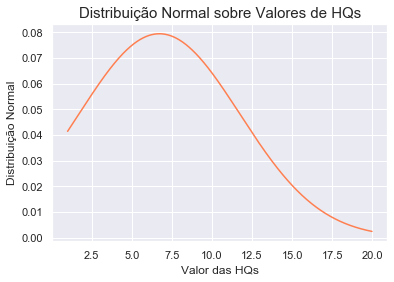

In [12]:
import scipy

mean = np.mean(preco)
std = np.std(preco)

x = np.linspace(min(preco), max(preco), len(preco))
y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')
plt.title('Distribuição Normal sobre Valores de HQs',fontsize=15)
plt.xlabel('Valor das HQs')
plt.ylabel('Distribuição Normal')
plt.show()